## Exploratory Data Analysis

In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [ ]:
awards = pd.read_csv("..", "data", "project_data", "awards_players.csv")
coaches = pd.read_csv(Path("..", "data", "project_data", "coaches.csv"))
players_teams = pd.read_csv(Path("..", "data", "project_data", "players_teams.csv"))
players = pd.read_csv(Path("..", "data", "project_data", "players.csv"))
series_post = pd.read_csv(Path("..", "data", "project_data", "series_post.csv"))
teams_post = pd.read_csv(Path("..", "data", "project_data", "teams_post.csv"))
teams = pd.read_csv(Path("..", "data", "project_data", "teams.csv"))

### 1. Search for irrelevant attributes/features

#### Awards Table

In [4]:
# Count of different lgIDs
print("Count of different lgIDs:")
print(awards['lgID'].value_counts())
print("\n")
# All lgIDs are the same, so we can assume they are irrelevant to our analysis

Count of different lgIDs:
lgID
WNBA    95
Name: count, dtype: int64




#### Coaches Table

In [5]:
# Count of different lgIDs
print("Count of different lgIDs:")
print(coaches['lgID'].value_counts())
print("\n")
# All lgIDs are the same, so we can assume they are irrelevant to our analysis

Count of different lgIDs:
lgID
WNBA    162
Name: count, dtype: int64




#### Players Teams Table

In [6]:
# Count of different lgIDs
print("Count of different lgIDs:")
print(players_teams['lgID'].value_counts())
print("\n")
# All lgIDs are the same, so we can assume they are irrelevant to our analysis

Count of different lgIDs:
lgID
WNBA    1876
Name: count, dtype: int64




#### Players Table

In [7]:
# Player firstSeason and lastSeason Distribution
print("Value Distribution of firstseason")
print(players['firstseason'].value_counts())
print("\n")

print("Value Distribution of lastseason")
print(players['lastseason'].value_counts())
print("\n")

# Devemos preencher estes valores de alguma forma. Podemos olhar para o primeiro ano em que jogaram na tabela players_teams para firstSeason...

# Player Death Date Distribution 0000-00-00 vs not 0000-00-00 (0000-00-00 means alive)
print("Value Distribution of deathDate")
print(players['deathDate'].value_counts())
print("\n")

# Player collegeOther Distribution NULL vs NOT NULL
print("Value Distribution of collegeOther")
print(players['collegeOther'].isnull().value_counts())

Value Distribution of firstseason
firstseason
0    893
Name: count, dtype: int64


Value Distribution of lastseason
lastseason
0    893
Name: count, dtype: int64


Value Distribution of deathDate
deathDate
0000-00-00    889
2011-05-27      1
1999-08-19      1
1999-01-18      1
2001-05-12      1
Name: count, dtype: int64


Value Distribution of collegeOther
collegeOther
True     882
False     11
Name: count, dtype: int64


#### Series Post, Teams_Post and Teams

In [8]:
# Count of different lgIDs in series_post
print("Count of different lgIDs in series_post:")
print(series_post['lgIDWinner'].value_counts())
print(series_post['lgIDLoser'].value_counts())
print("\n")

# Count of different lgIDs in teams_post
print("Count of different lgIDs in teams_post:")
print(teams_post['lgID'].value_counts())
print("\n")

# Count of different lgIDs in teams
print("Count of different lgIDs in teams:")
print(teams['lgID'].value_counts())
# All lgIDs are the same, so we can assume they are irrelevant to our analysis

Count of different lgIDs in series_post:
lgIDWinner
WNBA    70
Name: count, dtype: int64
lgIDLoser
WNBA    70
Name: count, dtype: int64


Count of different lgIDs in teams_post:
lgID
WNBA    80
Name: count, dtype: int64


Count of different lgIDs in teams:
lgID
WNBA    142
Name: count, dtype: int64


List of rookies (by year):

In [9]:
rookies_by_year = {}
min_year = players_teams['year'].min()
max_year = players_teams['year'].max()
previous_years_players = set()

for year in range(min_year + 1,max_year + 1):
    current_years = players_teams[players_teams['year'] == year]
    current_years_players = set(current_years['playerID'])

    rookies = current_years_players - previous_years_players
    rookies_by_year[year] = rookies

    previous_years_players.update(current_years_players)

for year, rookies in rookies_by_year.items():
    print(f"Year: {year}")
    print(f"Rookies: {rookies}")

Year: 2
Rookies: {'millsta01w', 'byearla01w', 'smithch03w', 'edwarto01w', 'maxwemo01w', 'folklkr01w', 'williad01w', 'cantydo01w', 'holdsch01w', 'nolande01w', 'figgsuk01w', 'malcona01w', 'pavlimi01w', 'thompal01w', 'thomast01w', 'azzije01w', 'goodsad01w', 'wyckobr01w', 'jacksta01w', 'moweje01w', 'streiju01w', 'wolvean01w', 'johnsti01w', 'williwe01w', 'edwarmi01w', 'beviltu01w', 'campbed01w', 'staleda01w', 'andrame01w', 'farriba01w', 'fordst01w', 'machacl01w', 'spornra01w', 'melvich01w', 'vangomi01w', 'griffyo01w', 'stafftr01w', 'palmewe01w', 'enissh01w', 'hicksje01w', 'jacksta02w', 'colleka01w', 'burgean01w', 'sauerpa01w', 'whitmta01w', 'walsema01w', 'scottol01w', 'pettibr01w', 'crawlsy01w', 'martima01w', 'radunha01w', 'rileyru01w', 'stedika01w', 'tuvicsl01w', 'hendene01w', 'smithta01w', 'wolteka01w', 'gibsoke01w', 'schumke01w', 'saureau01w', 'johnsvi01w', 'clearmi01w', 'taylope01w', 'feastal01w', 'reddja01w', 'stepama01w', 'miltode01w', 'abrossv01w', 'luzhe01w', 'lazicka01w', 'johnssh0

### 2. Data Cleaning

#### Players Table

In [10]:
#The college and collegeOther columns are irrelevant for our project so we drop them from our table
players_clean = players.drop(columns=["college", "collegeOther"])

#We want to use linear regression imputation to fill in the player's missing height and weight data~

# Replace 0 with NaN for height and weight
players_clean.loc[players_clean["height"] <= 40, "height"] = np.nan
players_clean.loc[players_clean["weight"] <= 80, "weight"] = np.nan

#Simple linear regression function
def simple_linear_regression(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    # slope b = Σ((x - x̄)(y - ȳ)) / Σ((x - x̄)^2)
    b = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)
    
    # intercept a = ȳ - b * x̄
    a = y_mean - b * x_mean
    
    return a, b

#Using linear regression to predict hwight based on weight
players_clean_height = players_clean.dropna(subset = ["height", "weight"])
a_height, b_height = simple_linear_regression(players_clean_height["weight"].values, players_clean_height["height"].values)

#Imputing missing Height
missing_height = players_clean["height"].isna() & players_clean["weight"].notna()
players_clean.loc[missing_height, "height"] = a_height + b_height * players_clean.loc[missing_height, "weight"]

#Using linear regression to predict weight based on height
players_clean_weight = players_clean.dropna(subset = ["height", "weight"])
a_weight, b_weight = simple_linear_regression(players_clean_weight["height"].values, players_clean_weight["weight"].values)

#Imputing missing Weight
missing_weight = players_clean["weight"].isna() & players_clean["height"].notna()
players_clean.loc[missing_weight, "weight"] = a_weight + b_weight * players_clean.loc[missing_weight, "height"]

#We save our new clean table in a new csv file
players_clean.to_csv(Path("project_data/players_clean.csv"), index=False)

print("Clean table without 'college' and 'collegeOther' and filled in missing data saved in new file called 'players_clean.csv'")

Clean table without 'college' and 'collegeOther' and filled in missing data saved in new file called 'players_clean.csv'


### 3. Visual Data Representation (Plots and Graphs)

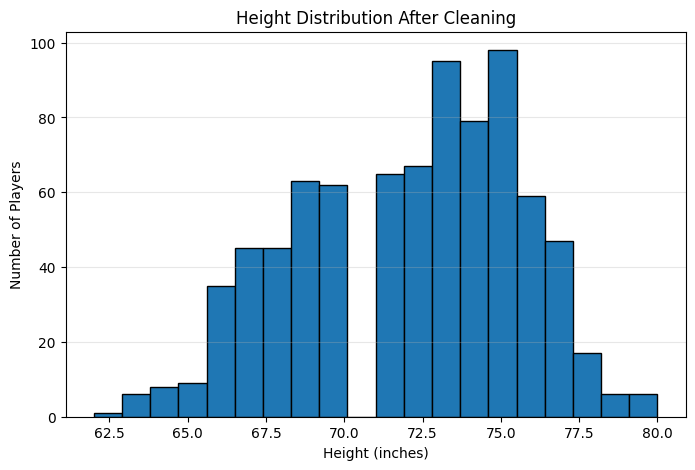

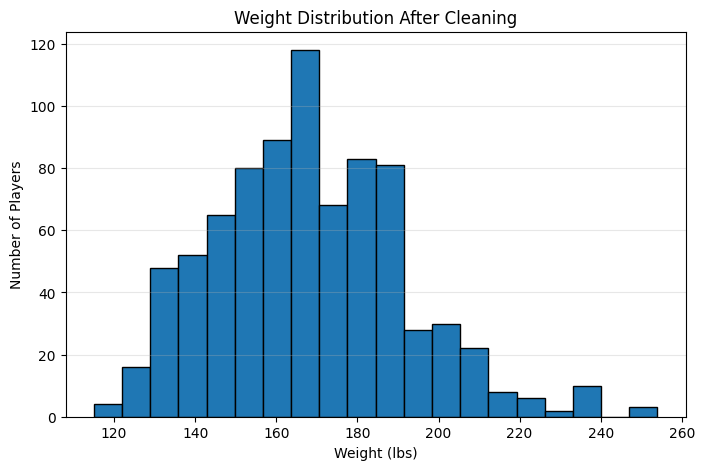

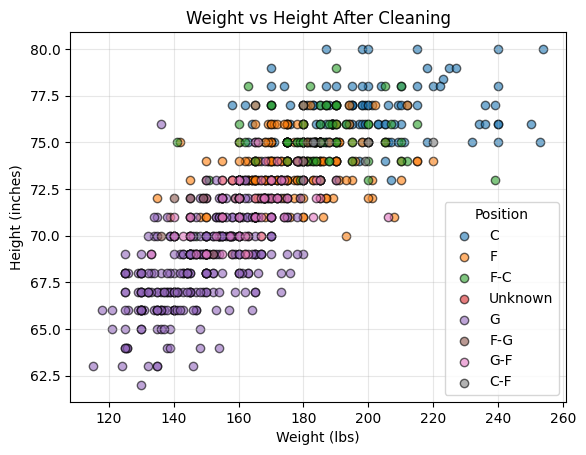

In [12]:
# --- Height Histogram ---
plt.figure(figsize=(8,5))
plt.hist(players_clean["height"], bins=20, edgecolor="black")
plt.title("Height Distribution After Cleaning")
plt.xlabel("Height (inches)")
plt.ylabel("Number of Players")
plt.grid(axis="y", alpha=0.3)
plt.show()

# --- Weight Histogram ---
plt.figure(figsize=(8,5))
plt.hist(players_clean["weight"], bins=20, edgecolor="black")
plt.title("Weight Distribution After Cleaning")
plt.xlabel("Weight (lbs)")
plt.ylabel("Number of Players")
plt.grid(axis="y", alpha=0.3)
plt.show()

# --- Height vs Weight Scatter ---
positions = players_clean["pos"].fillna("Unknown")
for pos in positions.unique():
    subset = players_clean[positions == pos]
    plt.scatter(subset["weight"], subset["height"], alpha=0.6, edgecolor="k", label=pos)

plt.title("Height vs. Weight of Players by Position")
plt.title("Weight vs Height After Cleaning")
plt.ylabel("Height (inches)")
plt.xlabel("Weight (lbs)")
plt.legend(title="Position")
plt.grid(alpha=0.3)
plt.show()